# Data Analysis in Business
## By Daria Lapko, Konstantin Shashkov, Timofey Sluev. DSBA 201.

### Libraries

Let's import the necessary modules first

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Part 1. Data exploration
<hr color=green>

In [2]:
# First, we need to read the data
df_base = pd.read_excel("data.xlsx")
df = df_base.copy(deep=True)
df.head(20)

,Order_ID,Phone_new,Source,OrderDate,Время заказа в часах,месяц,Status,OneClick,CancelReason,DeliveryType,...,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Week,TN,TK,Субъект,Region
0,1959000328_TT,116117_tu28@yandex.ru,Колл-центр,2016-03-01,12,201603,Выдан клиенту,0,Клиент передумал,Самовывоз,...,Велоаксессуары,1,533,0,533,9,Спорт и активный отдых,Аксессуары для спортивных товаров,Новосибирская обл.,SIBERIA
1,1959000329_TT,116117_tu28@yandex.ru,Колл-центр,2016-03-01,12,201603,Отменен,0,Нет товара,Курьерская,...,Доставка,1,250,0,250,9,Услуги,Услуги,Москва,CENTRAL
2,5859234_BX,116117_tu28@yandex.ru,Онлайн-Резерв.,2016-04-26,14,201604,Отменен,1,Несколько заказов,Заказ отменен,...,Доставка,1,0,0,0,17,Услуги,Услуги,Москва,CENTRAL
3,1866001414_TT,1866001414_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL
4,1866001414_TT,1866001414_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Планшеты на Android,1,8999,0,8999,9,Цифровая Техника,Планшеты,Москва,CENTRAL
5,1866001415_TT,1866001415_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL
6,1866001415_TT,1866001415_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,LED телевизоры,1,15230,0,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL
7,1866001417_TT,1866001417_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL
8,1866001417_TT,1866001417_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Apple iPhone,1,25999,0,25999,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL
9,1866001419_TT,1866001419_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL


In [3]:
# View some data
df.head(10)

,Order_ID,Phone_new,Source,OrderDate,Время заказа в часах,месяц,Status,OneClick,CancelReason,DeliveryType,...,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Week,TN,TK,Субъект,Region
0,1959000328_TT,116117_tu28@yandex.ru,Колл-центр,2016-03-01,12,201603,Выдан клиенту,0,Клиент передумал,Самовывоз,...,Велоаксессуары,1,533,0,533,9,Спорт и активный отдых,Аксессуары для спортивных товаров,Новосибирская обл.,SIBERIA
1,1959000329_TT,116117_tu28@yandex.ru,Колл-центр,2016-03-01,12,201603,Отменен,0,Нет товара,Курьерская,...,Доставка,1,250,0,250,9,Услуги,Услуги,Москва,CENTRAL
2,5859234_BX,116117_tu28@yandex.ru,Онлайн-Резерв.,2016-04-26,14,201604,Отменен,1,Несколько заказов,Заказ отменен,...,Доставка,1,0,0,0,17,Услуги,Услуги,Москва,CENTRAL
3,1866001414_TT,1866001414_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL
4,1866001414_TT,1866001414_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Планшеты на Android,1,8999,0,8999,9,Цифровая Техника,Планшеты,Москва,CENTRAL
5,1866001415_TT,1866001415_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL
6,1866001415_TT,1866001415_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,LED телевизоры,1,15230,0,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL
7,1866001417_TT,1866001417_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL
8,1866001417_TT,1866001417_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Apple iPhone,1,25999,0,25999,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL
9,1866001419_TT,1866001419_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Доставка,1,0,0,0,9,Услуги,Услуги,Москва,CENTRAL


In [4]:
# Observe some data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356017 entries, 0 to 356016
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Order_ID              356017 non-null  object        
 1   Phone_new             356017 non-null  object        
 2   Source                356017 non-null  object        
 3   OrderDate             356017 non-null  datetime64[ns]
 4   Время заказа в часах  356017 non-null  int64         
 5   месяц                 356017 non-null  int64         
 6   Status                356017 non-null  object        
 7   OneClick              356017 non-null  int64         
 8   CancelReason          356017 non-null  object        
 9   DeliveryType          356017 non-null  object        
 10  PaymentType           356017 non-null  object        
 11  Город                 356017 non-null  object        
 12  Store_ID              356017 non-null  int64         
 13 

We can observe that the data presents a set of orders of an online store. It consists of 356017 entries and 22 fields, including the ones describing the product type, the customer's contacts, the order status, delivery information, and timing. Each record contains the following datatypes: 1 datetime field (*OrderDate*), 9 int64 fields, and 12 object fields, which constitute to the string data that could not be automatically parsed to any standard Pandas datatype.

### Missing values

Let us print the number of missing values accross different columns and their percentage among all data in this column.

In [5]:
# Count the missing values
df_nan = pd.DataFrame({})
df_nan["# empty (NaN)"] = df.isna().sum()
df_nan["% empty (NaN)"] = df.isna().sum()/df[df.columns[0]].count()*100
df_nan

,# empty (NaN),% empty (NaN)
Order_ID,0,0.000000
Phone_new,0,0.000000
Source,0,0.000000
OrderDate,0,0.000000
Время заказа в часах,0,0.000000
месяц,0,0.000000
Status,0,0.000000
OneClick,0,0.000000
CancelReason,0,0.000000
DeliveryType,0,0.000000


The printout above shows that only 64 rows out of 356017 contain missing values. The percentage on the right shows that this number is negligibly small, so one can remove such records without any significant impact on the analysis.

In [6]:
# Drop missing values
df.dropna(inplace=True)

### Duplicated records
Every record represents an order to the online store. The field *Order_ID* should be uniquely defined for every order and vice-versa. Hence, all similar records should be dropped from the dataframe.

In [7]:
# Drop duplicate entries
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353842 entries, 0 to 356016
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Order_ID              353842 non-null  object        
 1   Phone_new             353842 non-null  object        
 2   Source                353842 non-null  object        
 3   OrderDate             353842 non-null  datetime64[ns]
 4   Время заказа в часах  353842 non-null  int64         
 5   месяц                 353842 non-null  int64         
 6   Status                353842 non-null  object        
 7   OneClick              353842 non-null  int64         
 8   CancelReason          353842 non-null  object        
 9   DeliveryType          353842 non-null  object        
 10  PaymentType           353842 non-null  object        
 11  Город                 353842 non-null  object        
 12  Store_ID              353842 non-null  int64         
 13 

### Now, consider the numeric and categorical variables (as automatically predetected) separately.

In [8]:
# Separate numerical data from categorical data
data_num = df.select_dtypes(exclude=['object', 'datetime64'])
data_cat = df.select_dtypes(include=['object', 'datetime64'])

In [9]:
data_num.head()

,Время заказа в часах,месяц,OneClick,Store_ID,Quant,RowPrice,RowDiscount,RowSum,Week
0,12,201603,0,3249,1,533,0,533,9
1,12,201603,0,2189,1,250,0,250,9
2,14,201604,1,2189,1,0,0,0,17
3,9,201603,0,3305,1,0,0,0,9
4,9,201603,0,3305,1,8999,0,8999,9


In [10]:
data_cat.head()

,Order_ID,Phone_new,Source,OrderDate,Status,CancelReason,DeliveryType,PaymentType,Город,NomGroup,TN,TK,Субъект,Region
0,1959000328_TT,116117_tu28@yandex.ru,Колл-центр,2016-03-01,Выдан клиенту,Клиент передумал,Самовывоз,Наличные,Новосибирск,Велоаксессуары,Спорт и активный отдых,Аксессуары для спортивных товаров,Новосибирская обл.,SIBERIA
1,1959000329_TT,116117_tu28@yandex.ru,Колл-центр,2016-03-01,Отменен,Нет товара,Курьерская,Наличные,Москва,Доставка,Услуги,Услуги,Москва,CENTRAL
2,5859234_BX,116117_tu28@yandex.ru,Онлайн-Резерв.,2016-04-26,Отменен,Несколько заказов,Заказ отменен,Наличные,Москва,Доставка,Услуги,Услуги,Москва,CENTRAL
3,1866001414_TT,1866001414_TT,Терминал,2016-03-01,Отменен,Не поступила оплата,Самовывоз,Наличные,Москва,Доставка,Услуги,Услуги,Москва,CENTRAL
4,1866001414_TT,1866001414_TT,Терминал,2016-03-01,Отменен,Не поступила оплата,Самовывоз,Наличные,Москва,Планшеты на Android,Цифровая Техника,Планшеты,Москва,CENTRAL


### Consider the categorical variables first

In [11]:
# Review the number of categorical unique values
df_cat_info = pd.DataFrame({})
df_cat_info["# unique"] = data_cat.nunique(dropna=False)
df_cat_info["% unique"] = data_cat.nunique()/data_cat[data_cat.columns[0]].count()*100
df_cat_info

,# unique,% unique
Order_ID,166262,46.987639
Phone_new,126449,35.736006
Source,4,0.001130
OrderDate,61,0.017239
Status,15,0.004239
CancelReason,34,0.009609
DeliveryType,3,0.000848
PaymentType,7,0.001978
Город,73,0.020631
NomGroup,849,0.239938


According to the table above, the highest number of unique values is found in *Order_ID* and *Phone_new* column, while *Source* and *Delivery* type have the lowest number.

Now, we shall print the values of different categorical variables to check them one by one for possible issues.

In [12]:
# Check the unique values
uniq_vals = pd.DataFrame()
for i in data_cat.columns:
    print(i)
    print(pd.unique(data_cat[i]))

Order_ID
['1959000328_TT' '1959000329_TT' '5859234_BX' ... '1956000485_TT'
 '5414891_BX' '5808921_BX']
Phone_new
['116117_tu28@yandex.ru' '1866001414_TT' '1866001415_TT' ...
 '6669108117_lu17@inbox.ru' '9108109_lm16@yahoo.com'
 '97109_am28@yahoo.com']
Source
['Колл-центр' 'Онлайн-Резерв.' 'Терминал' 'Сайт']
OrderDate
['2016-03-01T00:00:00.000000000' '2016-04-26T00:00:00.000000000'
 '2016-03-02T00:00:00.000000000' '2016-03-05T00:00:00.000000000'
 '2016-03-08T00:00:00.000000000' '2016-03-11T00:00:00.000000000'
 '2016-03-12T00:00:00.000000000' '2016-03-13T00:00:00.000000000'
 '2016-03-15T00:00:00.000000000' '2016-03-23T00:00:00.000000000'
 '2016-04-08T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-19T00:00:00.000000000' '2016-04-21T00:00:00.000000000'
 '2016-04-24T00:00:00.000000000' '2016-03-30T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-03-10T00:00:00.000000000' '2016-03-25T00:00:00.000000000'
 '2016-04-03T00:00:00.000000000

Firstly, we spotted repetitions and similar values in *CancelReason*. Let us merge them.

In [13]:
# Group cancel reasons
df["CancelReason"] = df['CancelReason'].replace('Витринный образец/Брак товара', "Витрина/брак/некондиция/качество товара")
df["CancelReason"] = df['CancelReason'].replace('Качество товара', "Витрина/брак/некондиция/качество товара")
df["CancelReason"] = df['CancelReason'].replace('Не устроило время доставки', "Не устроили дата/время доставки")
df["CancelReason"] = df['CancelReason'].replace('Не устроила дата доставки', "Не устроили дата/время доставки")

It was also found that names of some variables are not completely understandable and do not convey the meaning of this variable. Hence, we shall rename them.

In [14]:
# Make names sensible
df.rename(columns={"NomGroup": "Item", "TN": "Category", "TK": "Type"}, inplace=True)

Right now columns stand in not a very conveninent order. We propose to swap *Category* and *Type* (right now we consider only categorical-type columns).

In [15]:
# Reindex dataframe
df = df.reindex(columns=df.columns)

Remove "Доставка" column. Since it is added to most of the orders and breaks the clustering.

In [16]:
# Drop to avoid multicollinearilty
df = df.drop(df[df["Item"] == "Доставка"].index)
df

,Order_ID,Phone_new,Source,OrderDate,Время заказа в часах,месяц,Status,OneClick,CancelReason,DeliveryType,...,Item,Quant,RowPrice,RowDiscount,RowSum,Week,Category,Type,Субъект,Region
0,1959000328_TT,116117_tu28@yandex.ru,Колл-центр,2016-03-01,12,201603,Выдан клиенту,0,Клиент передумал,Самовывоз,...,Велоаксессуары,1,533,0,533,9,Спорт и активный отдых,Аксессуары для спортивных товаров,Новосибирская обл.,SIBERIA
4,1866001414_TT,1866001414_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Планшеты на Android,1,8999,0,8999,9,Цифровая Техника,Планшеты,Москва,CENTRAL
6,1866001415_TT,1866001415_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,LED телевизоры,1,15230,0,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL
8,1866001417_TT,1866001417_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Apple iPhone,1,25999,0,25999,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL
10,1866001419_TT,1866001419_TT,Терминал,2016-03-01,9,201603,Отменен,0,Не поступила оплата,Самовывоз,...,LED телевизоры,1,15230,0,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356010,1956000486_TT,9108109_lm16@yahoo.com,Онлайн-Резерв.,2016-03-01,12,201603,Выдан клиенту,0,Не отменен,Самовывоз,...,Смесители для кухни,1,2690,0,2690,9,Сделай сам,Сантехника,Липецкая обл.,CENTRAL
356012,5414891_BX,9108109_lm16@yahoo.com,Терминал,2016-03-02,17,201603,Отменен,0,Не поступила оплата,Самовывоз,...,Мобильные телефоны,1,4099,0,4099,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL
356013,1959000326_TT,97109_am28@yahoo.com,Онлайн-Резерв.,2016-03-01,12,201603,Выдан клиенту,0,Не отменен,Самовывоз,...,Велосипеды,1,5340,660,4680,9,Спорт и активный отдых,Велосипеды и аксессуары,Ростовская обл.,SOUTHERN
356014,1959000326_TT,97109_am28@yahoo.com,Онлайн-Резерв.,2016-03-01,12,201603,Выдан клиенту,0,Не отменен,Самовывоз,...,Коньки,1,2620,0,2620,9,Спорт и активный отдых,Зимние виды спорта,Ростовская обл.,SOUTHERN


Finally, we've seen that some variables contradict each other, and so we should delete such rows so not to mess up during further analysis.

In [17]:
# Bad Status, No Cancel Reason
df = df.drop(df[((df['Status'] == 'Отменен') | (df['Status'] == 'Отказ на месте')) & (df['CancelReason'] == 'Не отменен')].index)

# Good Status, Bad Cancel Reason
df = df.drop(df[((df['Status'] != 'Отменен') & (df['Status'] != 'Отказ на месте')) & (df['CancelReason'] != 'Не отменен')].index)

# Bad DeliveryType, No Cancel Reason
df = df.drop(df[(df['DeliveryType'] == 'Заказ отменен') & (df['CancelReason'] == 'Не отменен')].index)

# Bad DeliveryType, Good Status
df = df.drop(df[(df['DeliveryType'] == 'Заказ отменен') & ((df['Status'] != 'Отменен') & (df['Status'] != 'Отказ на месте'))].index)

For visual representation and to better understand the data contents, we build the graphs and charts of several variables.

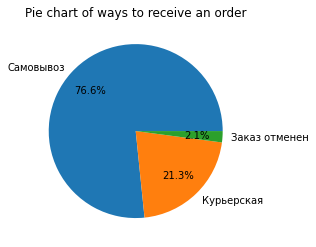

In [18]:
# Pie chart of ways to receive an order
plt.pie(df['DeliveryType'].value_counts(), labels=df['DeliveryType'].unique(), pctdistance=.7, autopct='%1.1f%%')
plt.title("Pie chart of ways to receive an order");

It is clearly seen from the pie chart that more than 3/4 of people chose delivery when making an order. About one fifth of all customers canceled their order, and only a very small part took self pickup.

Important note: the fact that about 20% of orders according to the chart were canceled does not mean this is the real number of orders canceled. As we can see from the initial table, there exist orders which were assigned to delivery/pickup but had status "Отменен".

Text(0.5, 0, 'Count')

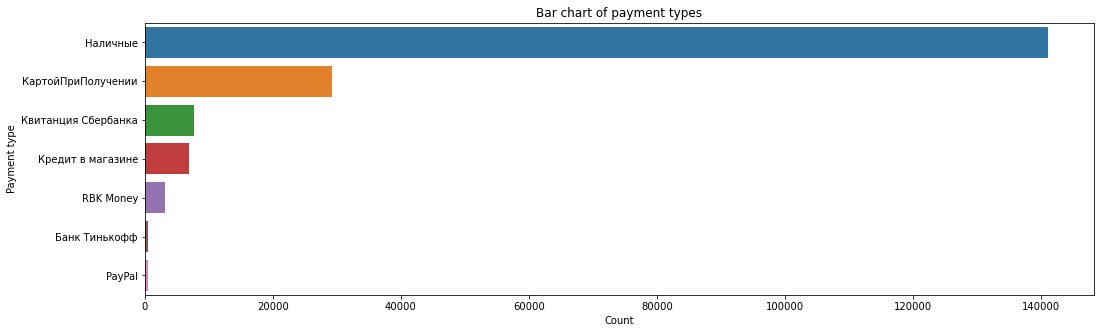

In [19]:
# Bar chart of payment types
fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(y=df['PaymentType'].unique(), x=df['PaymentType'].value_counts())
plt.title("Bar chart of payment types")
plt.ylabel("Payment type")
plt.xlabel("Count")

Looking at the bar chart above we can see that most of the orders were paid by cash: more than 250 000 cases of such. The second popular way to pay is by card when receiving the order: about 50 000 cases. The least popular ways are through Tinkoff bank and PayPal system.

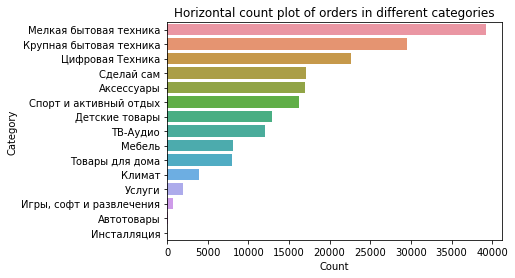

In [20]:
# Countplot of orders in different categories
sns.countplot(data=df, y='Category', order=df['Category'].value_counts(ascending=False).index)
plt.title("Horizontal count plot of orders in different categories")
plt.xlabel("Count");

The last plot shows us that the greatest amount of things is bought in category "Услуги". This is simply because this category includes delivery, which is paid and goes with almost every other category, as we have seen in pie chart before. Looking at the real items, the most is bought in "Мелкая бытовая техника" (about 40 000) and "Крупная бытовая техника" (about 30 000), while the least in "Инсталляция" and "Автотовары".

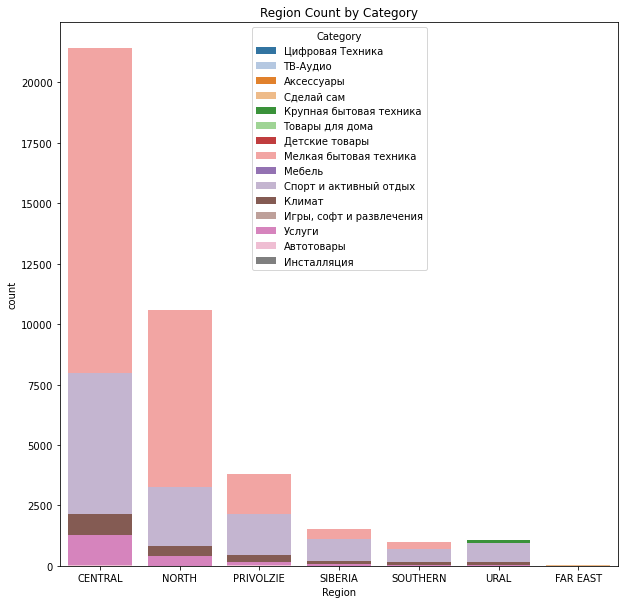

In [21]:
# Region count by category
plt.figure(figsize= (10,10))
sns.countplot(data=df, order=df["Region"].value_counts(ascending=False).index, x="Region", hue="Category", dodge=False, palette="tab20")
plt.title('Region Count by Category');

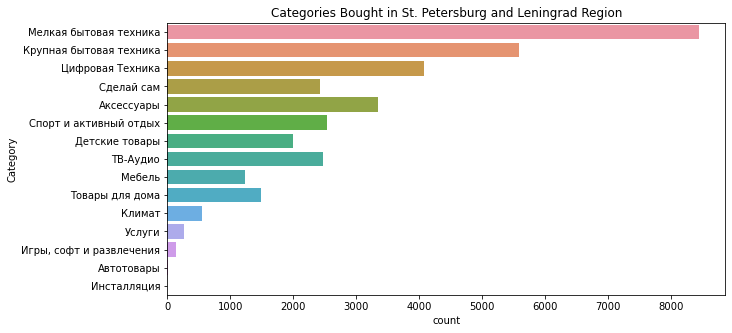

In [22]:
# Categories in SpB and LenOblast
plot_data_lenobl = df[df['Субъект']=='Ленинградская обл.']
plot_data_spb = df[df['Субъект']=='Санкт-Петербург']
plot_data1 = pd.concat([plot_data_spb, plot_data_lenobl])
plt.figure(figsize=(10,5))
sns.countplot(data=plot_data1, y='Category', order=df["Category"].value_counts(ascending=False).index)
plt.title("Categories Bought in St. Petersburg and Leningrad Region");

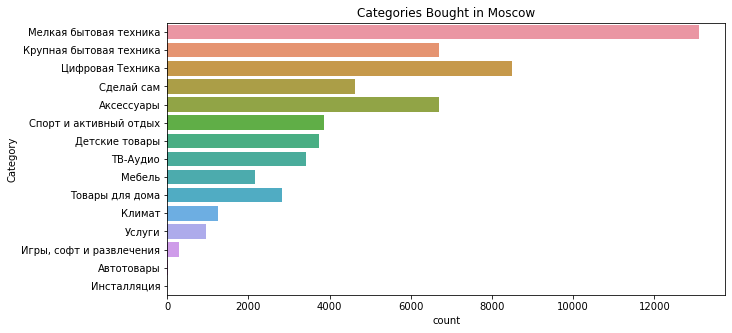

In [23]:
# Categories in Moscow
plot_data = df[df['Субъект']=='Москва']
plt.figure(figsize=(10,5))
sns.countplot(data=plot_data, y='Category', order=df["Category"].value_counts(ascending=False).index)
plt.title("Categories Bought in Moscow");

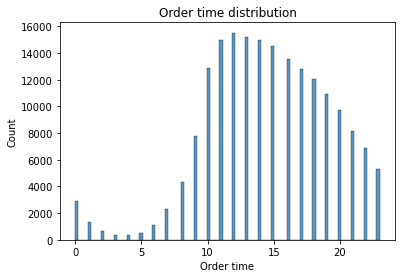

In [24]:
# Order time distribution
sns.histplot(data = df, x = 'Время заказа в часах')
plt.xlabel("Order time")
plt.title("Order time distribution");

Unfortunately, *OrderDate* cannot be encoded as categorical variable, so we should invent another way to present time data. We decided to divide date on day number, month number and weekday. Three new columns with therefore appear instead of *OrderDate*: *dayNum*, *monthNum*, and *weekdayNum*.

In [25]:
# Encode datetime
df["dayNum"] = df["OrderDate"].dt.day
df["monthNum"] = df["OrderDate"].dt.month
df["weekdayNum"] = df["OrderDate"].dt.weekday
date = df["OrderDate"]
df = df.drop(columns = "OrderDate")

The *Phone_new* column is deleted from the data frame because it cannot be used for modelling (is categorical but cannot be encoded normally), but its data is saved in a numeric way (frequency of purchases) for future use in RFM model.

In [26]:
# Work with Phone_new category
countBuy = df['Phone_new'].map(df['Phone_new'].value_counts())
df = df.drop(columns = "Phone_new")

### Now consider the numeric features

In [27]:
# Consider the numeric features
df_numeric = pd.DataFrame({})
df_numeric["mean"] = data_num.mean()
df_numeric["median"] = data_num.median()
df_numeric["min"] = data_num.min()
df_numeric["max"] = data_num.max()
df_numeric["sd"] = data_num.std()
df_numeric["# unique"] = data_num.nunique(dropna=False)
df_numeric["% unique"] = data_num.nunique()/data_num[data_num.columns[0]].count()*100
df_numeric["# zero"] = data_num.agg(lambda x: x.eq(0).sum())
df_numeric["% zero"] = data_num.agg(lambda x: x.eq(0).sum())/data_num[data_num.columns[0]].count()*100
df_numeric

,mean,median,min,max,sd,# unique,% unique,# zero,% zero
Время заказа в часах,14.488831,14.0,0,23,4.697269,24,0.006783,5329,1.506039
месяц,201603.484550,201603.0,201603,201604,0.499762,2,0.000565,0,0.000000
OneClick,0.084665,0.0,0,1,0.278383,2,0.000565,323884,91.533509
Store_ID,3583.819063,3458.0,2189,9999,1244.316689,166,0.046914,0,0.000000
Quant,1.035722,1.0,0,285,0.947207,43,0.012152,4,0.001130
RowPrice,5123.022075,590.0,0,676240,10737.781230,9593,2.711097,151822,42.906721
RowDiscount,82.014464,0.0,0,56090,552.779787,2001,0.565507,330378,93.368792
RowSum,5151.136680,599.0,0,676240,10953.380305,12367,3.495063,152287,43.038136
Week,12.877134,13.0,9,17,2.593430,9,0.002544,0,0.000000


The information above tells us general information about every single numeric variable. For example, we can see that median number of items bought of 1 type is 1, while maximum number is 285; the mean row price is 5123.02 while standard deviation is 10737.78; etc. We can also spot that there is a variable with binary (0 and 1) values only: *OneClick*.

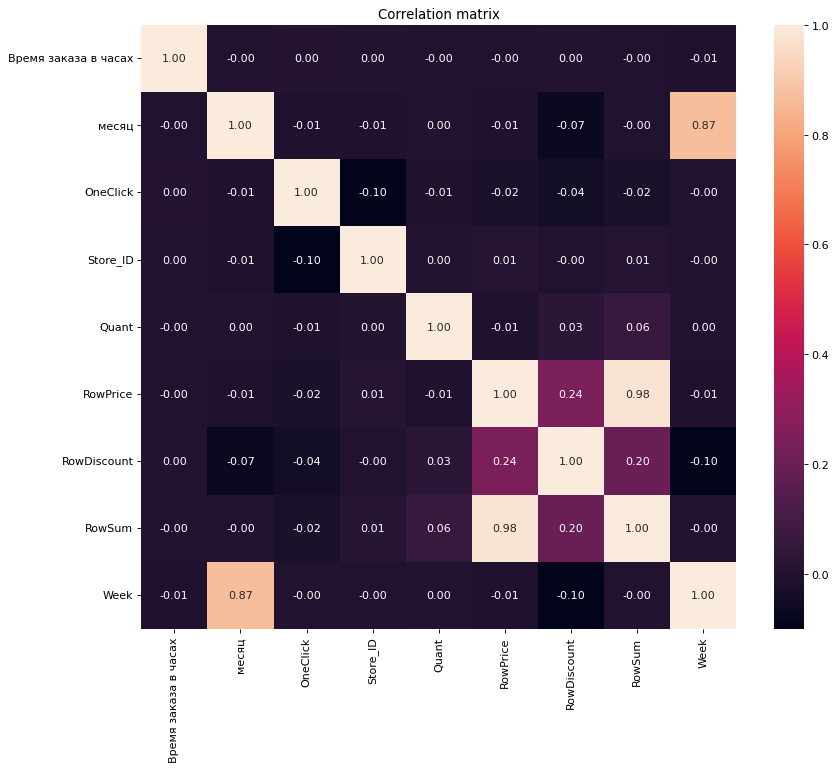

In [28]:
# Correlation heatmap
correlation_mat = data_num.corr()
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(correlation_mat, annot = True, fmt=".2f")
plt.title("Correlation matrix");

According to the correlation matrix printed above, most of the numeric variables do not correlate (have neglibile values that range from -0.10 to 0.10). High positive correlation is spotted between *Week* and *месяц*, *RowSum* and *RowPrice*; small to medium correlation is between *RowPrice* and *RowDiscount*, *RowSum* and *RowDiscount*. All these correlations are explainable: *RowSum* includes *RowDiscount* and *RowPrice*, while *месяц* and *Week* are date variables.

It was spotted that *месяц* variable is not informative since we already have *OrderDate* which contains year, month and day of order. Hence, we can delete this column from the table.

In [29]:
# Remove multicollinearity
df = df.drop(columns="месяц")

### Product categories

Consider a table of product categories to have a better understnading of the store's assortment.


In [32]:
product_categories = data_cat[['TN', 'TK', 'NomGroup']].drop_duplicates().sort_values(by=['TN', 'TK'])
product_categories

,TN,TK,NomGroup
12942,Автотовары,Автопринадлежности,Автомобильные компрессоры
25758,Автотовары,Аккумуляторы,Автоинверторы
85110,Автотовары,Аккумуляторы,Пуско-зарядные устройства
266,Аксессуары,Аксессуары ТВ-Аудио,Пульты ДУ
818,Аксессуары,Аксессуары ТВ-Аудио,Кронштейны для микроволновой печи
...,...,...,...
2568,Цифровая Техника,Фотоаппараты,Компактные цифровые фотоаппараты
33527,Цифровая Техника,Фотоаппараты,Фотоаппараты со сменной оптикой
98614,Цифровая Техника,Фотоаппараты,Объективы
180239,Цифровая Техника,Фотоаппараты,Вспышки


### Data preparation

Before moving on to models, we ought to prepare a new data frame, which will not include cofusing data for the algorithms. The columns *Order_ID* and *Store_ID* do own such data, and even though it is important in general we cannot utilize it in modelling.

In [33]:
data = df.copy()
data = data.drop(columns=["Order_ID", "Store_ID"])
data_initial = data.copy()
data

,Source,Время заказа в часах,Status,OneClick,CancelReason,DeliveryType,PaymentType,Город,Item,Quant,...,RowDiscount,RowSum,Week,Category,Type,Субъект,Region,dayNum,monthNum,weekdayNum
4,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Планшеты на Android,1,...,0,8999,9,Цифровая Техника,Планшеты,Москва,CENTRAL,1,3,1
6,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,LED телевизоры,1,...,0,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL,1,3,1
8,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Apple iPhone,1,...,0,25999,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL,1,3,1
10,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,LED телевизоры,1,...,0,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL,1,3,1
12,Терминал,10,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Москва,Внешние аккумуляторы,1,...,291,1199,9,Аксессуары,Электропитание,Москва,CENTRAL,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356010,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,КартойПриПолучении,Липецк,Смесители для кухни,1,...,0,2690,9,Сделай сам,Сантехника,Липецкая обл.,CENTRAL,1,3,1
356012,Терминал,17,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Мобильные телефоны,1,...,0,4099,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL,2,3,2
356013,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Ростов-на-Дону,Велосипеды,1,...,660,4680,9,Спорт и активный отдых,Велосипеды и аксессуары,Ростовская обл.,SOUTHERN,1,3,1
356014,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Ростов-на-Дону,Коньки,1,...,0,2620,9,Спорт и активный отдых,Зимние виды спорта,Ростовская обл.,SOUTHERN,1,3,1


To prepare categorical data for making models we ought to perform encoding of variables. We chose one-hot encoding because this is one of the easiest and most popular encodings, and also because no other encodings is suitable here (e.g. ordinal encoding: data in variables cannot be ordered here).

In [34]:
categorical_cols = data.select_dtypes(include=["object"]).columns
data = pd.get_dummies(data, columns = categorical_cols)
data

,Время заказа в часах,OneClick,Quant,RowPrice,RowDiscount,RowSum,Week,dayNum,monthNum,weekdayNum,...,Субъект_Чувашская республика,Субъект_Ямало-Ненецкий а.о.,Субъект_Ярославская обл.,Region_CENTRAL,Region_FAR EAST,Region_NORTH,Region_PRIVOLZIE,Region_SIBERIA,Region_SOUTHERN,Region_URAL
4,9,0,1,8999,0,8999,9,1,3,1,...,0,0,0,1,0,0,0,0,0,0
6,9,0,1,15230,0,15230,9,1,3,1,...,0,0,0,1,0,0,0,0,0,0
8,9,0,1,25999,0,25999,9,1,3,1,...,0,0,0,1,0,0,0,0,0,0
10,9,0,1,15230,0,15230,9,1,3,1,...,0,0,0,1,0,0,0,0,0,0
12,10,0,1,1490,291,1199,9,1,3,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356010,12,0,1,2690,0,2690,9,1,3,1,...,0,0,0,1,0,0,0,0,0,0
356012,17,0,1,4099,0,4099,9,2,3,2,...,0,0,0,1,0,0,0,0,0,0
356013,12,0,1,5340,660,4680,9,1,3,1,...,0,0,0,0,0,0,0,0,1,0
356014,12,0,1,2620,0,2620,9,1,3,1,...,0,0,0,0,0,0,0,0,1,0


## Model

#### K-means clustering

In [35]:
data_scaled = MinMaxScaler().fit_transform(data)

In [36]:
data_pca = PCA(n_components=0.8, random_state=42).fit_transform(data_scaled)
data_pca

array([[-5.29951788e-01,  1.56703500e+00, -2.68128352e-02, ...,
         1.88719078e-01,  2.70670266e-01,  1.96115420e-02],
       [-5.18176412e-01,  1.52281709e+00,  9.77547596e-03, ...,
         1.72737673e-01,  3.97315740e-01,  1.70863542e-01],
       [-5.24229271e-01,  1.61747111e+00, -6.09536579e-02, ...,
         1.84059689e-01,  3.42056876e-01,  1.14209575e-01],
       ...,
       [ 1.86787511e-01, -6.75544113e-01, -6.17148656e-01, ...,
        -2.26745452e-02,  4.12005955e-02,  2.23026091e-02],
       [ 1.83790083e-01, -6.83823440e-01, -6.38038269e-01, ...,
         1.86421082e-04,  3.40794034e-02,  7.32798191e-03],
       [ 1.32745665e-01,  9.83382647e-01,  7.03894086e-01, ...,
        -4.32304231e-01,  2.13409664e-01,  1.21576315e-01]])

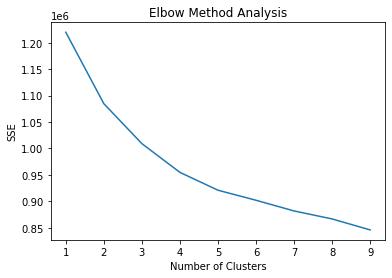

In [37]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title('Elbow Method Analysis');

In [38]:
model = KMeans(init="random", n_clusters=5, n_init=10, random_state=1)
model.fit(data_pca)
fitted = model.labels_

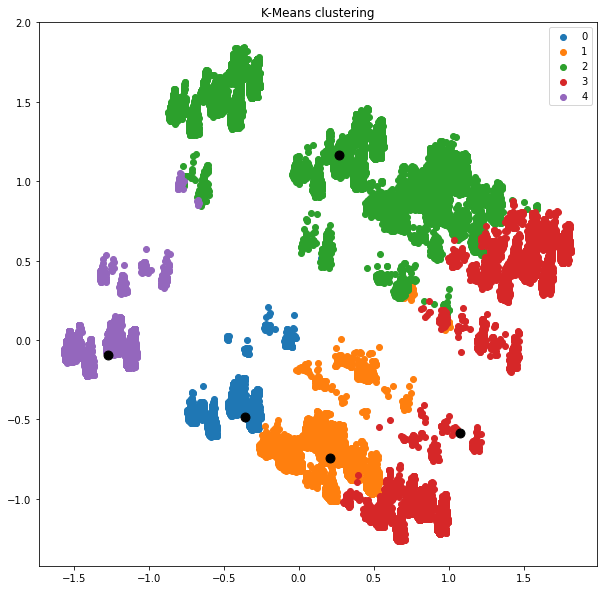

In [39]:
labels = np.unique(fitted)
centroids = model.cluster_centers_
plt.figure(figsize=(10, 10))
for i in labels:
     plt.scatter(data_pca[fitted == i , 0] , data_pca[fitted == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('K-Means clustering');

In [40]:
df_numclus = pd.DataFrame({})
df_numclus["% data"] = np.unique(fitted, return_counts=True)[1]/df.shape[0]
df_numclus

,% data
0,0.152513
1,0.178116
2,0.285956
3,0.182862
4,0.200553


#### DBSCAN

In [41]:
data_sampled = data.sample(n=100000)

In [42]:
data_scaled = MinMaxScaler().fit_transform(data_sampled)

In [43]:
data_pca = PCA(n_components=0.8, random_state=42).fit_transform(data_scaled)
data_pca

array([[ 0.90715922, -1.17664808,  0.10363617, ...,  0.02430757,
         0.00792999, -0.09108888],
       [-1.40407563, -0.13043775,  0.82425624, ..., -0.00186822,
        -0.04893749,  0.00290294],
       [ 0.42878635, -0.93184697, -0.4654759 , ...,  0.001988  ,
         0.31150323, -0.5290739 ],
       ...,
       [-0.10960804, -0.78341045,  0.58768949, ...,  0.01989409,
        -0.01714105,  0.01792151],
       [-0.50496175,  1.51908371,  0.45618605, ..., -0.26152394,
        -0.14726903, -0.08613728],
       [ 0.21888481, -0.7039578 , -0.4725879 , ..., -0.0712401 ,
         0.03666744, -0.22210162]])

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.8).fit(data_pca)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3])

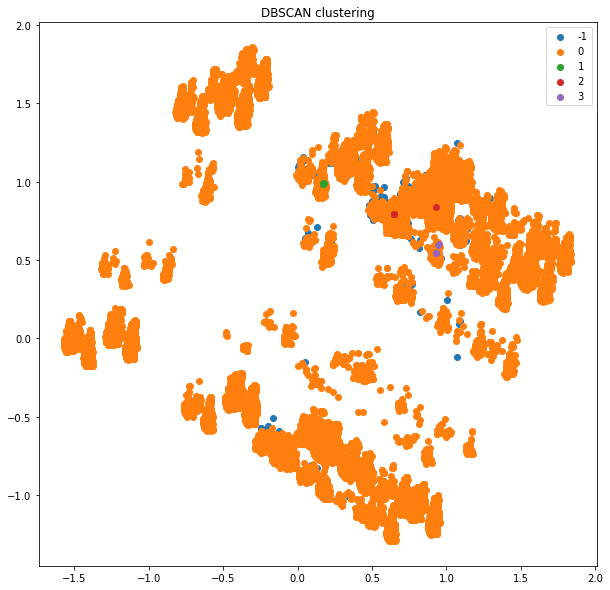

In [45]:
labels = np.unique(dbscan.labels_)
plt.figure(figsize=(10, 10))
for i in labels:
     plt.scatter(data_pca[dbscan.labels_ == i , 0] , data_pca[dbscan.labels_ == i , 1] , label = i)
plt.legend()
plt.title('DBSCAN clustering');

#### BIRCH

In [46]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=3)
birch_labels = brc.fit_predict(data_pca)

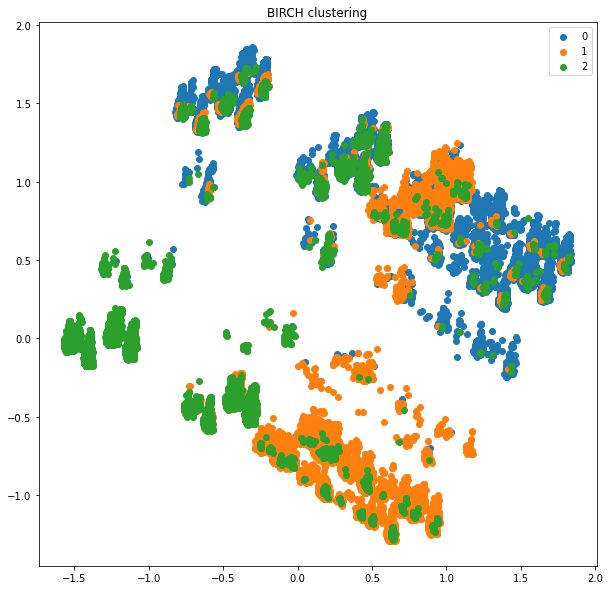

In [47]:
brcl = np.unique(birch_labels)
plt.figure(figsize=(10, 10))
for i in brcl:
     plt.scatter(data_pca[birch_labels == i , 0] , data_pca[birch_labels == i , 1] , label = i)
plt.legend()
plt.title('BIRCH clustering');

### RFM

In [48]:
df_RFM = data.copy()
date = date.apply(lambda x : x.timestamp()).astype(int)
df_RFM["OrderDate"] = date
df_RFM["NumOrders"] = countBuy
df_RFM_overview = pd.DataFrame({})
df_RFM_overview["mean"] = round(df_RFM[["OrderDate", "NumOrders", "RowSum"]].mean(),2)
df_RFM_overview["min"] = df_RFM[["OrderDate","NumOrders", "RowSum"]].min()
df_RFM_overview["max"] = df_RFM[["OrderDate","NumOrders", "RowSum"]].max()
df_RFM_overview

,mean,min,max
OrderDate,1.459321e+09,1456790400,1461974400
NumOrders,1.765000e+01,1,1359
RowSum,9.556670e+03,0,676240


In [49]:
quantiles = round(df_RFM[["OrderDate", "NumOrders", "RowSum"]].quantile([1.0/3.0, 2.0/3.0]),0).to_dict()
quantiles

{'OrderDate': {0.3333333333333333: 1458345600.0,
  0.6666666666666666: 1460246400.0},
 'NumOrders': {0.3333333333333333: 1.0, 0.6666666666666666: 2.0},
 'RowSum': {0.3333333333333333: 2499.0, 0.6666666666666666: 8990.0}}

In [50]:
def R_score(x):
    if x <= quantiles['OrderDate'][1.0/3.0]:
        return 1
    elif x <= quantiles['OrderDate'][2.0/3.0]:
        return 2
    else:
        return 3

def FM_score(x, y):
    if x <= quantiles[y][1.0/3.0]:
        return 3
    elif x <= quantiles[y][2.0/3.0]:
        return 2
    else:
        return 1

In [51]:
df_RFM['R'] = df_RFM['OrderDate'].apply(lambda x: R_score(x))
df_RFM['F'] = df_RFM['NumOrders'].apply(lambda x: FM_score(x, 'NumOrders'))
df_RFM['M'] = df_RFM['RowSum'].apply(lambda x: FM_score(x, 'RowSum'))

In [52]:
df_RFM['RFMScore'] = df_RFM['R'].map(str) + df_RFM['F'].map(str) + df_RFM['M'].map(str)
df_RFM['RFMScore'] = df_RFM['RFMScore'].astype(int)
df_RFM.head()

,Время заказа в часах,OneClick,Quant,RowPrice,RowDiscount,RowSum,Week,dayNum,monthNum,weekdayNum,...,Region_PRIVOLZIE,Region_SIBERIA,Region_SOUTHERN,Region_URAL,OrderDate,NumOrders,R,F,M,RFMScore
4,9,0,1,8999,0,8999,9,1,3,1,...,0,0,0,0,1456790400,1,1,3,1,131
6,9,0,1,15230,0,15230,9,1,3,1,...,0,0,0,0,1456790400,1,1,3,1,131
8,9,0,1,25999,0,25999,9,1,3,1,...,0,0,0,0,1456790400,1,1,3,1,131
10,9,0,1,15230,0,15230,9,1,3,1,...,0,0,0,0,1456790400,1,1,3,1,131
12,10,0,1,1490,291,1199,9,1,3,1,...,0,0,0,0,1456790400,1,1,3,3,133


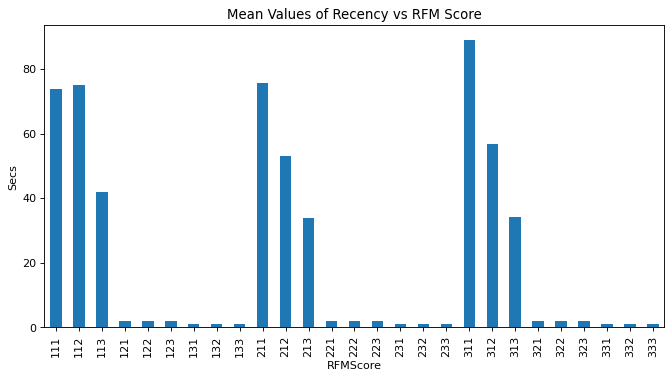

In [53]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
df_RFM.groupby('RFMScore').agg('NumOrders').mean().plot(kind='bar')
plt.title("Mean Values of Recency vs RFM Score")
plt.ylabel("Secs");

In [54]:
def RFMcluster(lower, upper):
    return df_RFM.loc[(df_RFM['RFMScore'] >= lower) & (df_RFM['RFMScore'] <= upper)]

In [55]:
RFM_1 = RFMcluster(111,133)
RFM_2 = RFMcluster(211,233)
RFM_3 = RFMcluster(311,333)

In [56]:
pd.concat([RFM_1["RFMScore"].mode(), RFM_2["RFMScore"].mode(), RFM_3["RFMScore"].mode()]).dropna().T

0    132
0    232
0    332
Name: RFMScore, dtype: int64

Hence, our targets for analysis are the following segments: **132**, **232**, **332**.

## Clustering interpretation

In [57]:
len(fitted)

189197

In [58]:
ser = pd.Series(fitted)
data_initial = data_initial.assign(K_means = fitted)
data_initial

,Source,Время заказа в часах,Status,OneClick,CancelReason,DeliveryType,PaymentType,Город,Item,Quant,...,RowSum,Week,Category,Type,Субъект,Region,dayNum,monthNum,weekdayNum,K_means
4,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Планшеты на Android,1,...,8999,9,Цифровая Техника,Планшеты,Москва,CENTRAL,1,3,1,2
6,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,LED телевизоры,1,...,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL,1,3,1,2
8,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Apple iPhone,1,...,25999,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL,1,3,1,2
10,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,LED телевизоры,1,...,15230,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL,1,3,1,2
12,Терминал,10,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Москва,Внешние аккумуляторы,1,...,1199,9,Аксессуары,Электропитание,Москва,CENTRAL,1,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356010,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,КартойПриПолучении,Липецк,Смесители для кухни,1,...,2690,9,Сделай сам,Сантехника,Липецкая обл.,CENTRAL,1,3,1,0
356012,Терминал,17,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Мобильные телефоны,1,...,4099,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL,2,3,2,2
356013,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Ростов-на-Дону,Велосипеды,1,...,4680,9,Спорт и активный отдых,Велосипеды и аксессуары,Ростовская обл.,SOUTHERN,1,3,1,1
356014,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Ростов-на-Дону,Коньки,1,...,2620,9,Спорт и активный отдых,Зимние виды спорта,Ростовская обл.,SOUTHERN,1,3,1,1


### K-Means clustering interpretation

In [59]:
df_kmeans = pd.DataFrame({})
for col in data_initial.select_dtypes(exclude=['object', 'datetime64']):
    df_kmeans[col] = round(data_initial[col].groupby(data_initial["K_means"]).mean(),2)
df_kmeans = df_kmeans.drop(columns="K_means")
df_kmeans

,Время заказа в часах,OneClick,Quant,RowPrice,RowDiscount,RowSum,Week,dayNum,monthNum,weekdayNum
K_means,,,,,,,,,,
0,14.78,0.06,1.04,8754.86,169.76,8687.58,12.85,15.18,3.48,3.17
1,14.04,0.06,1.05,8987.20,202.36,8904.68,12.89,15.22,3.49,3.17
2,14.29,0.12,1.10,11824.06,136.60,12072.54,12.83,15.26,3.47,3.07
3,14.76,0.08,1.05,9199.56,144.72,9175.07,12.95,15.29,3.50,3.11
4,14.67,0.05,1.06,7511.27,125.45,7557.35,12.92,15.23,3.49,3.06


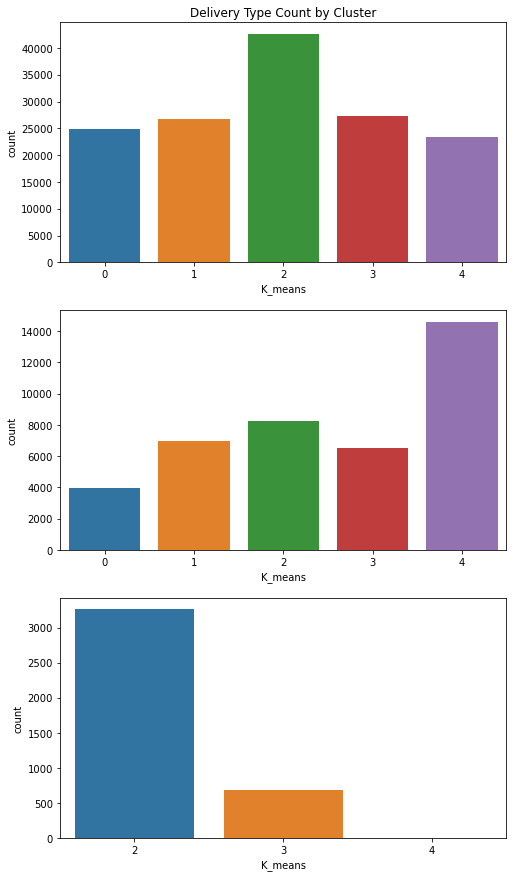

In [60]:
fig, ax = plt.subplots(3, 1, figsize=(8,15))
cnt = 0
for i in data_initial["DeliveryType"].unique():
    sns.countplot(data=data_initial[data_initial["DeliveryType"] == i], x="K_means", ax=ax[cnt])
    if (cnt == 0):
        ax[cnt].title.set_text('Delivery Type Count by Cluster');
    cnt+=1

In [61]:
data_initial["DeliveryType"].unique()

array(['Самовывоз', 'Курьерская', 'Заказ отменен'], dtype=object)

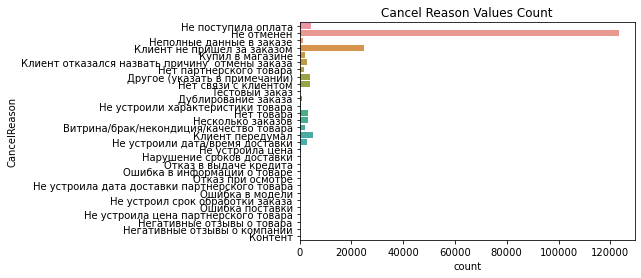

In [62]:
sns.countplot(data=data_initial, y="CancelReason")
plt.title('Cancel Reason Values Count');

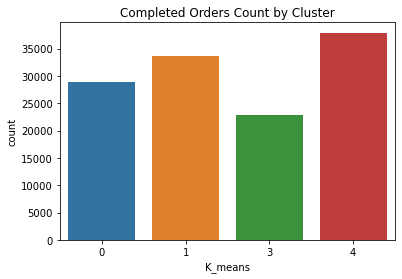

In [63]:
sns.countplot(data=data_initial[data_initial["CancelReason"] == "Не отменен"], x="K_means")
plt.title('Completed Orders Count by Cluster');

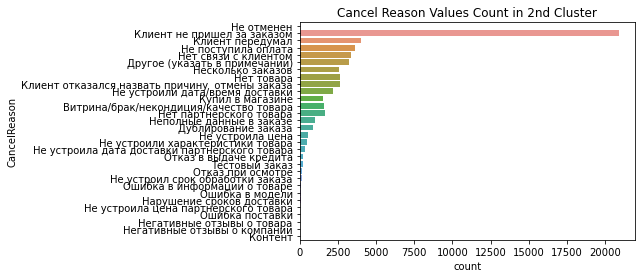

In [64]:
sns.countplot(data=data_initial[data_initial["K_means"] == 2], order=data_initial["CancelReason"].value_counts(ascending=False).index, y="CancelReason")
plt.title('Cancel Reason Values Count in 2nd Cluster');

['Наличные' 'КартойПриПолучении' 'Квитанция Сбербанка' 'Кредит в магазине'
 'RBK Money' 'Банк Тинькофф' 'PayPal']


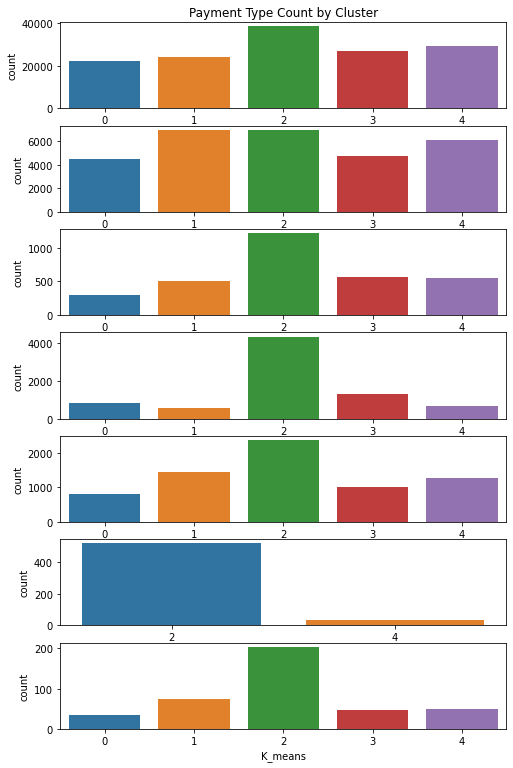

In [65]:
fig, ax = plt.subplots(7, 1, figsize=(8,13))
cnt = 0
print(data_initial["PaymentType"].unique())
for i in data_initial["PaymentType"].unique():
    sns.countplot(data=data_initial[data_initial["PaymentType"] == i], x="K_means", ax=ax[cnt], label=i)
    if (cnt == 0):
        ax[cnt].title.set_text('Payment Type Count by Cluster');
    cnt+=1

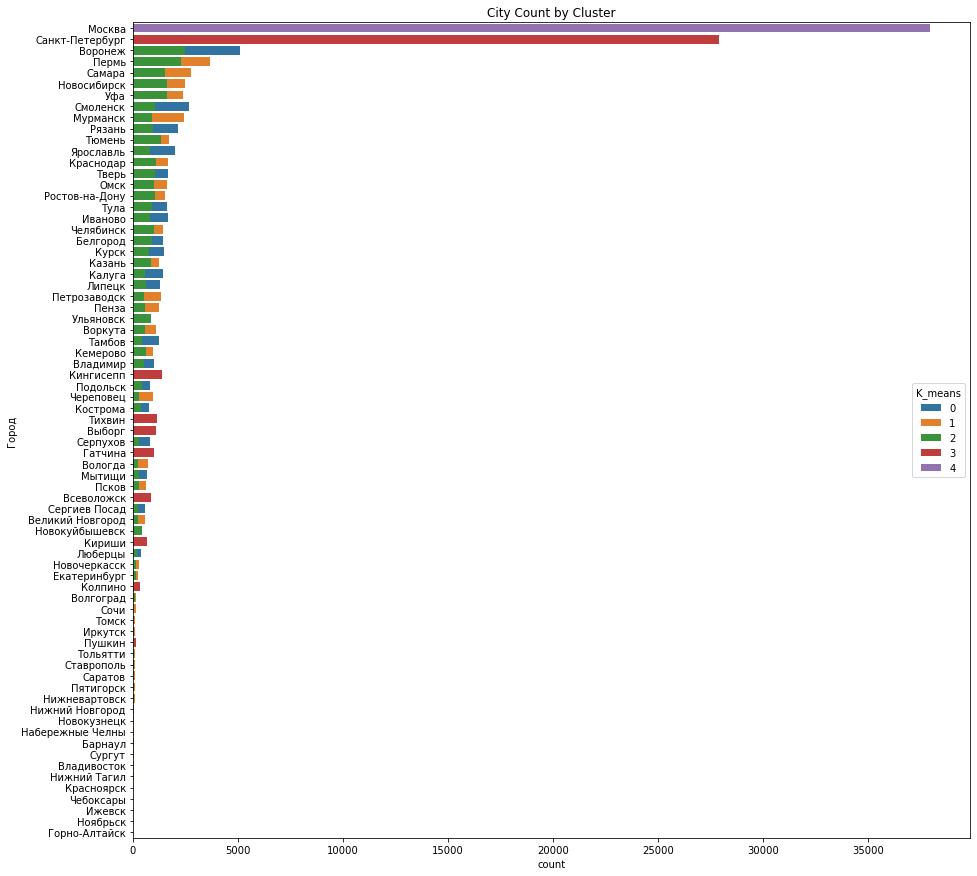

In [66]:
plt.figure(figsize= (15,15))
sns.countplot(data=data_initial, order=data_initial["Город"].value_counts(ascending=False).index, y="Город", hue="K_means", dodge=False)
plt.title('City Count by Cluster');

### RFM clustering interpretation

In [67]:
data_initial = data_initial.assign(RFMScore = df_RFM["RFMScore"])
data_initial

,Source,Время заказа в часах,Status,OneClick,CancelReason,DeliveryType,PaymentType,Город,Item,Quant,...,Week,Category,Type,Субъект,Region,dayNum,monthNum,weekdayNum,K_means,RFMScore
4,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Планшеты на Android,1,...,9,Цифровая Техника,Планшеты,Москва,CENTRAL,1,3,1,2,131
6,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,LED телевизоры,1,...,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL,1,3,1,2,131
8,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Apple iPhone,1,...,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL,1,3,1,2,131
10,Терминал,9,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,LED телевизоры,1,...,9,ТВ-Аудио,Телевизоры LCD,Москва,CENTRAL,1,3,1,2,131
12,Терминал,10,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Москва,Внешние аккумуляторы,1,...,9,Аксессуары,Электропитание,Москва,CENTRAL,1,3,1,4,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356010,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,КартойПриПолучении,Липецк,Смесители для кухни,1,...,9,Сделай сам,Сантехника,Липецкая обл.,CENTRAL,1,3,1,0,112
356012,Терминал,17,Отменен,0,Не поступила оплата,Самовывоз,Наличные,Москва,Мобильные телефоны,1,...,9,Цифровая Техника,Мобильные средства связи,Москва,CENTRAL,2,3,2,2,112
356013,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Ростов-на-Дону,Велосипеды,1,...,9,Спорт и активный отдых,Велосипеды и аксессуары,Ростовская обл.,SOUTHERN,1,3,1,1,112
356014,Онлайн-Резерв.,12,Выдан клиенту,0,Не отменен,Самовывоз,Наличные,Ростов-на-Дону,Коньки,1,...,9,Спорт и активный отдых,Зимние виды спорта,Ростовская обл.,SOUTHERN,1,3,1,1,112


In [68]:
data_initial = data_initial.loc[(df_RFM['RFMScore'] == 132) | (df_RFM['RFMScore'] == 232) | (df_RFM['RFMScore'] == 332)]
df_RFMseg = pd.DataFrame({})
for col in data_initial.select_dtypes(exclude=['object', 'datetime64']):
  df_RFMseg[col] = round(data_initial[col].groupby(data_initial["RFMScore"]).mean(),2)
df_RFMseg = df_RFMseg.drop(columns=["K_means","RFMScore"])
df_RFMseg

,Время заказа в часах,OneClick,Quant,RowPrice,RowDiscount,RowSum,Week,dayNum,monthNum,weekdayNum
RFMScore,,,,,,,,,,
132,14.58,0.11,1.02,5371.11,234.33,5180.21,9.89,9.36,3.00,3.09
232,14.59,0.10,1.03,5247.84,64.12,5230.67,12.90,15.93,3.48,3.36
332,14.59,0.10,1.03,5111.23,22.18,5141.42,15.91,20.27,4.00,2.87


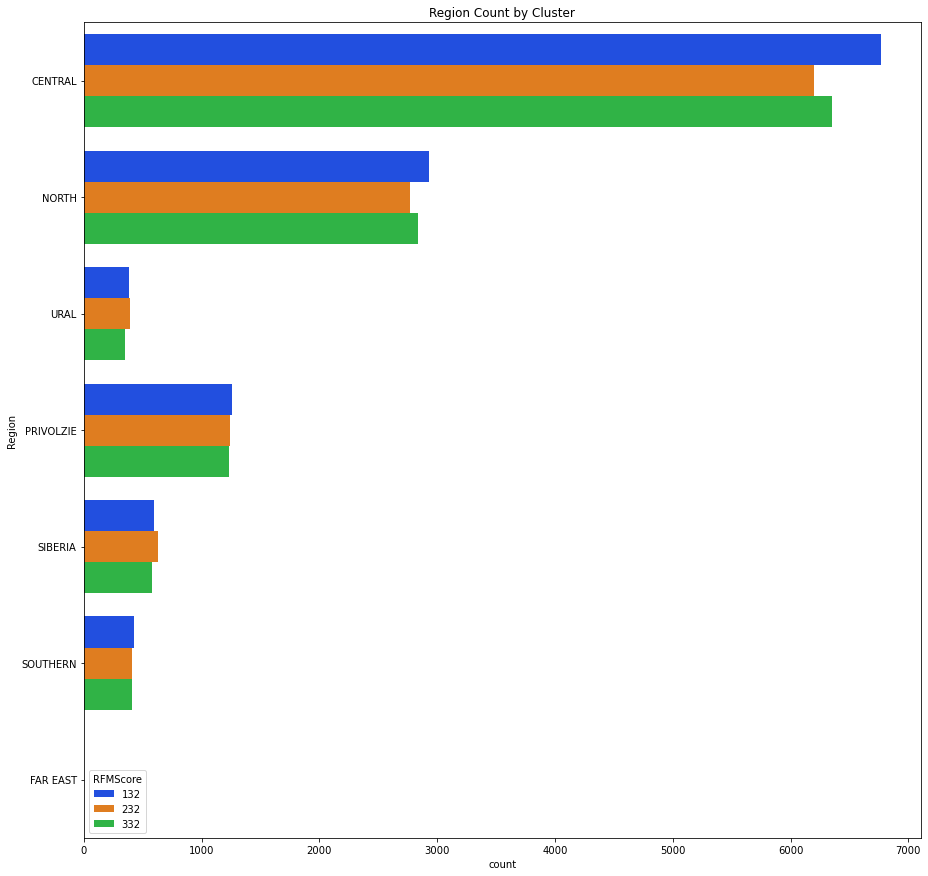

In [69]:
plt.figure(figsize= (15,15))
sns.countplot(data=data_initial, y="Region", palette='bright', hue="RFMScore", dodge=True)
plt.title('Region Count by Cluster');

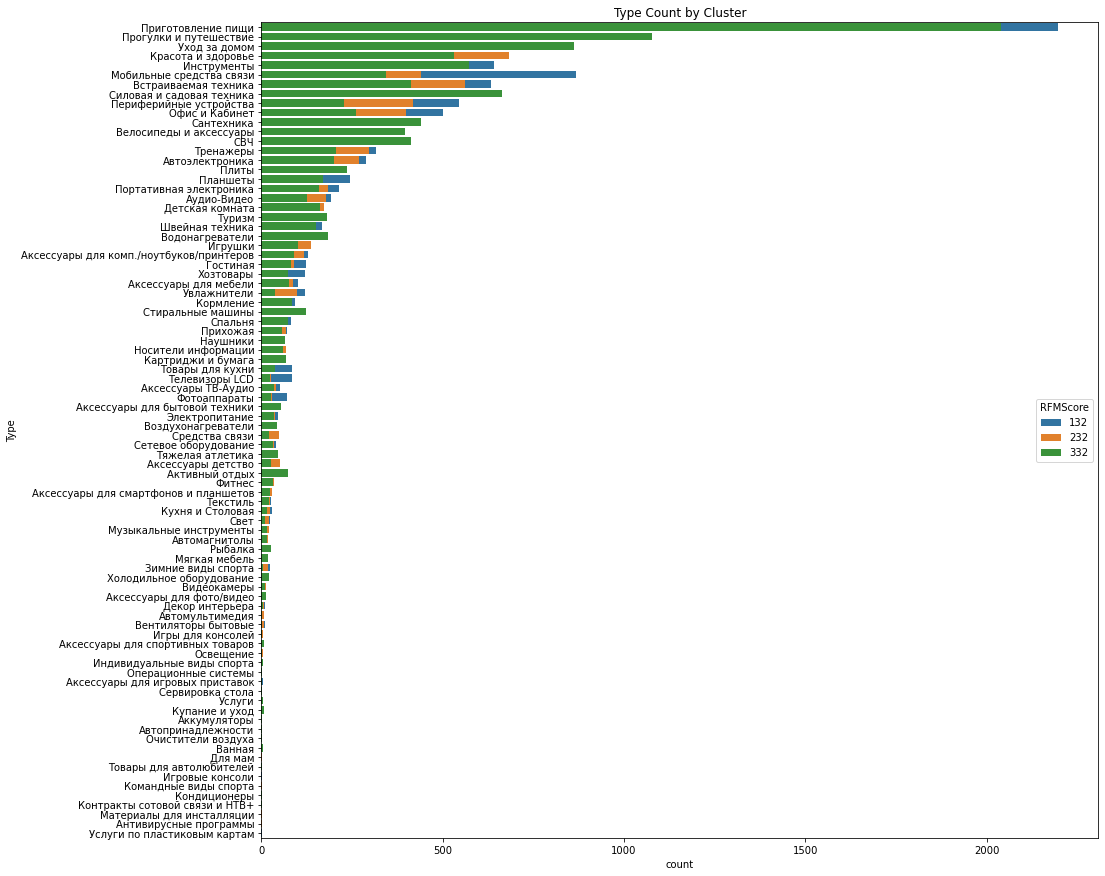

In [70]:
plt.figure(figsize= (15,15))
sns.countplot(data=data_initial, order=data_initial["Type"].value_counts(ascending=False).index, y="Type", hue="RFMScore", dodge=False)
plt.title('Type Count by Cluster');

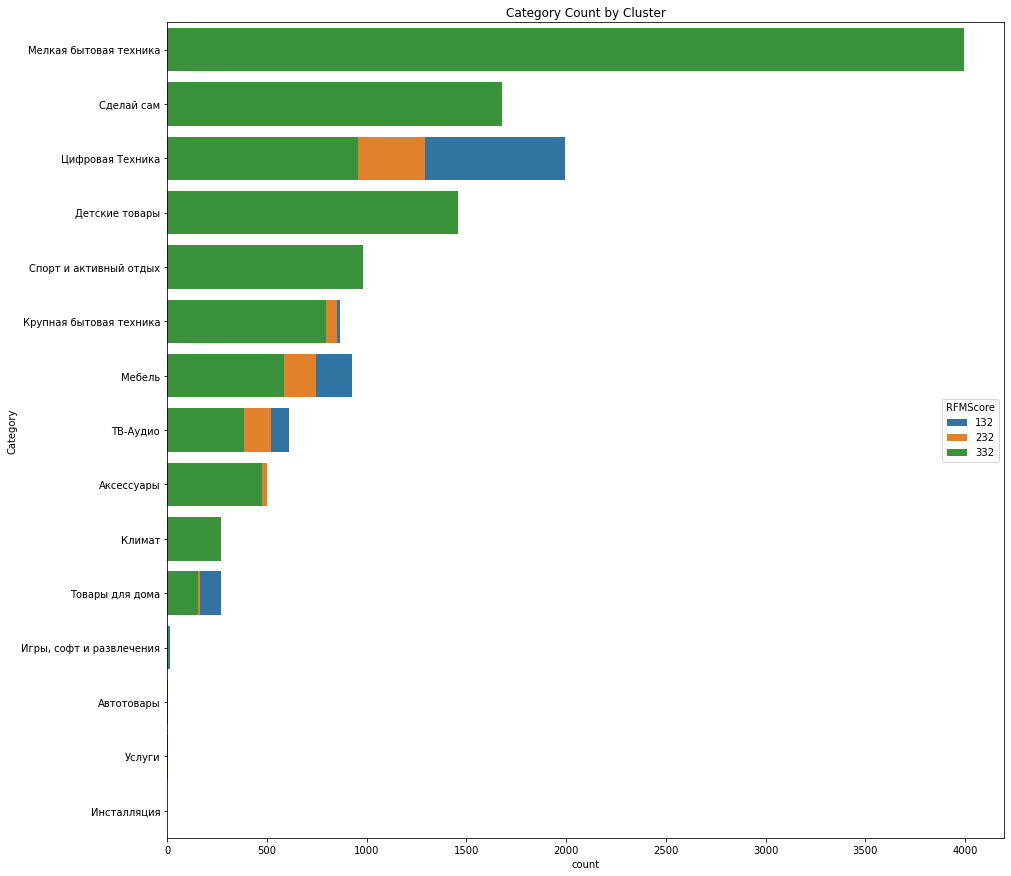

In [71]:
plt.figure(figsize= (15,15))
sns.countplot(data=data_initial, order=data_initial["Category"].value_counts(ascending=False).index, y="Category", hue="RFMScore", dodge=False)
plt.title('Category Count by Cluster');

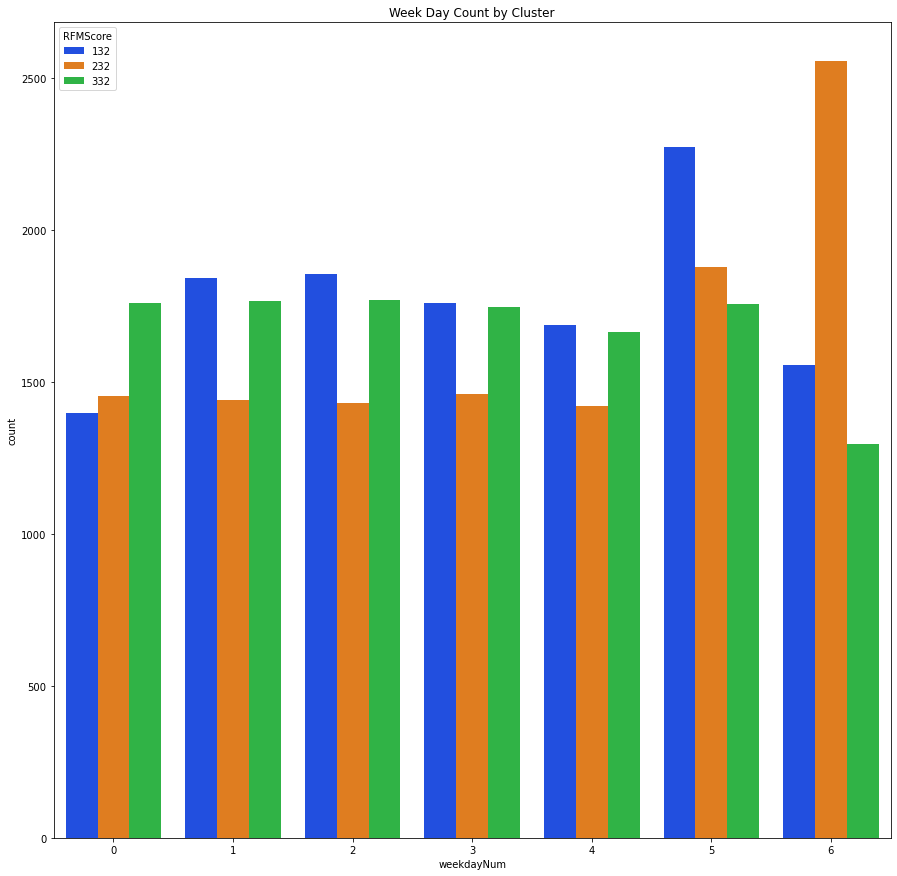

In [72]:
plt.figure(figsize= (15,15))
sns.countplot(data=data_initial, x="weekdayNum", hue="RFMScore", palette="bright")
plt.title('Week Day Count by Cluster');